# Quadratic well

In [23]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from basic_functions_bayesian import local_density, run_Metropolis, compute_single, compute

In [3]:
alpha = 1

### 1 dimension

In [4]:
mean = 0
std = 0.3
how_many = 100

x = np.random.normal(mean, std, size=how_many)

p0 = np.ones(len(x.T))
p0 = p0/np.sum(p0)

#### a. soft restraint on the elastic strength / variance

- what happens if the restraint is on the variance rather than on the elastic strength?

\begin{equation*}

|d\langle x^2\rangle| = \frac{1}{k^2} |dk|

\end{equation*}

therefore if we sample the hyper-ensemble by using $d\langle x^2\rangle$ or $dk$ (i.e., same n. of ensembles for the same variation of the av. value of $x^2$ or $1/x^2$) we get different results, instead with the Jeffreys prior there is not this ambiguity!

However, in this case the resulting optimal ensemble parametrized by $\lambda$ is a different set of ensembles in the two cases: $e^{-\lambda x^2}$ or $e^{-\lambda' \, 1/x^2}$

you can have the same functional form in the case of force-field fitting

In [5]:
g = (x - mean)**2

gexp = 0.3
sigma = 0.05

In [6]:
lambdas = 0.1

In [7]:
p0 = p0/np.sum(p0)

P = p0
"""`numpy.ndarray` reporting the new (reweighted) probability distribution."""

if len(g.shape) == 1: P *= np.exp(-lambdas*g)  # np.exp(-np.dot(lambda_i, g[np.newaxis, 0]))
else: P *= np.exp(-np.dot(lambdas, g))

Z = np.sum(P)
"""`float` reporting the partition function `Z lambda`."""
P = P/Z

In [8]:
lambdas = 0.1

out = compute_single(lambdas, p0, np.array([g]), gexp, sigma, alpha)
# out = compute_single(np.array([lambdas]), p0, np.array([g]), gexp, sigma, alpha)

vars(out)

{'P': array([0.00947224, 0.01014712, 0.0100631 , 0.01013227, 0.010101  ,
        0.00992081, 0.00991435, 0.00993321, 0.00986759, 0.01011061,
        0.01007055, 0.0100569 , 0.01014101, 0.01014276, 0.00997066,
        0.00992896, 0.01014732, 0.01013791, 0.01010458, 0.0101403 ,
        0.00979542, 0.00997799, 0.00988429, 0.00976213, 0.01013015,
        0.01012475, 0.00995352, 0.0095663 , 0.0100286 , 0.0098024 ,
        0.01014138, 0.00996449, 0.01011668, 0.01013162, 0.01000472,
        0.00983925, 0.00997372, 0.01012352, 0.00972589, 0.00991314,
        0.00984184, 0.010124  , 0.01012513, 0.01001644, 0.01014732,
        0.0101473 , 0.01013612, 0.00965465, 0.00990914, 0.01013335,
        0.00999347, 0.00991077, 0.01009203, 0.0092409 , 0.0100199 ,
        0.01013309, 0.01013477, 0.01014141, 0.01009812, 0.01014722,
        0.01005387, 0.00999   , 0.01013844, 0.01011688, 0.01006578,
        0.00986356, 0.01014271, 0.01011368, 0.01005251, 0.01013675,
        0.01013963, 0.01014197, 0.00967836,

In [9]:
lambdas = 0.1

out = compute_single(np.array([lambdas]), p0, np.array([g]), gexp, sigma, alpha)

vars(out)

{'P': array([0.00947224, 0.01014712, 0.0100631 , 0.01013227, 0.010101  ,
        0.00992081, 0.00991435, 0.00993321, 0.00986759, 0.01011061,
        0.01007055, 0.0100569 , 0.01014101, 0.01014276, 0.00997066,
        0.00992896, 0.01014732, 0.01013791, 0.01010458, 0.0101403 ,
        0.00979542, 0.00997799, 0.00988429, 0.00976213, 0.01013015,
        0.01012475, 0.00995352, 0.0095663 , 0.0100286 , 0.0098024 ,
        0.01014138, 0.00996449, 0.01011668, 0.01013162, 0.01000472,
        0.00983925, 0.00997372, 0.01012352, 0.00972589, 0.00991314,
        0.00984184, 0.010124  , 0.01012513, 0.01001644, 0.01014732,
        0.0101473 , 0.01013612, 0.00965465, 0.00990914, 0.01013335,
        0.00999347, 0.00991077, 0.01009203, 0.0092409 , 0.0100199 ,
        0.01013309, 0.01013477, 0.01014141, 0.01009812, 0.01014722,
        0.01005387, 0.00999   , 0.01013844, 0.01011688, 0.01006578,
        0.00986356, 0.01014271, 0.01011368, 0.01005251, 0.01013675,
        0.01013963, 0.01014197, 0.00967836,

In [10]:
lambdas = np.arange(-100, 100, 0.1)

results = compute(lambdas, p0, g, gexp, sigma, alpha)

results.keys()

dict_keys(['P', 'Z', 'av_g', 'av_g2', 'var_g', 'std_g', 'chi2', 'Srel', 'lossf', 'gamma', 'jeffreys', 'cov', 'dirichlet', 'avg_density'])

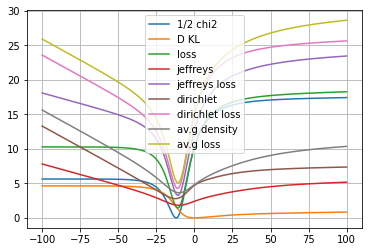

In [11]:
plt.plot(lambdas, 1/2*results['chi2'], label='1/2 chi2')
plt.plot(lambdas, -results['Srel'], label='D KL')
plt.plot(lambdas, results['lossf'], label='loss')
plt.plot(lambdas, -np.log(results['std_g']), label='jeffreys')
plt.plot(lambdas, results['lossf'] - np.log(results['std_g']), label='jeffreys loss')
plt.plot(lambdas, -np.log(results['dirichlet']), label='dirichlet')
plt.plot(lambdas, results['lossf'] - np.log(results['dirichlet']), label='dirichlet loss')
plt.plot(lambdas, -np.log(results['avg_density']), label='av.g density')
plt.plot(lambdas, results['lossf'] - np.log(results['avg_density']), label='av.g loss')

plt.grid()
plt.legend()
# plt.yscale('log')

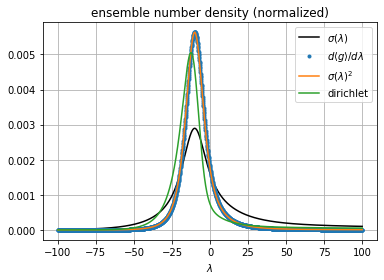

In [12]:
normalize = lambda x: x/np.sum(x)

plt.plot(lambdas, normalize(results['std_g']), '-', label=r'$\sigma(\lambda)$', c='k')
#plt.plot(lambdas,-np.log(dirichlets),'-',label='equiv. for Dirichlet')

plt.plot(lambdas[1:], normalize(np.abs(np.ediff1d(results['av_g'])/np.ediff1d(lambdas))), '.', label=r'$d\langle g\rangle/d\lambda$')
plt.plot(lambdas, normalize(results['std_g']**2), '-', label=r'$\sigma(\lambda)^2$')

plt.plot(lambdas, normalize(results['dirichlet']), '-', label='dirichlet')

plt.xlabel(r'$\lambda$')
plt.grid()
plt.legend()
# plt.xlim([-30, 30])
plt.title('ensemble number density (normalized)')
plt.show()

#### b. soft restraint on the equilibrium position

In [13]:
g = x

gexp = 0.3
sigma = 0.25

In [14]:
lambdas = np.arange(-100, 100, 0.1)

results = compute(lambdas, p0, g, gexp, sigma, alpha)

results.keys()

dict_keys(['P', 'Z', 'av_g', 'av_g2', 'var_g', 'std_g', 'chi2', 'Srel', 'lossf', 'gamma', 'jeffreys', 'cov', 'dirichlet', 'avg_density'])

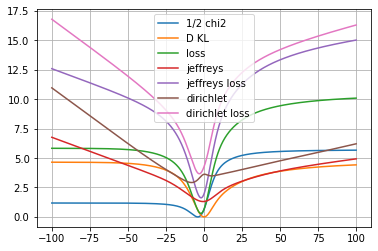

In [15]:
plt.plot(lambdas, 1/2*results['chi2'], label='1/2 chi2')
plt.plot(lambdas, -results['Srel'], label='D KL')
plt.plot(lambdas, results['lossf'], label='loss')
plt.plot(lambdas, -np.log(results['std_g']), label='jeffreys')
plt.plot(lambdas, results['lossf'] - np.log(results['std_g']), label='jeffreys loss')
plt.plot(lambdas, -np.log(results['dirichlet']), label='dirichlet')
plt.plot(lambdas, results['lossf'] - np.log(results['dirichlet']), label='dirichlet loss')

plt.grid()
plt.legend()
# plt.yscale('log')

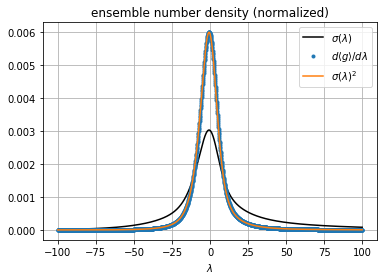

In [16]:
normalize = lambda x: x/np.sum(x)

plt.plot(lambdas, normalize(results['std_g']), '-', label=r'$\sigma(\lambda)$', c='k')
#plt.plot(lambdas,-np.log(dirichlets),'-',label='equiv. for Dirichlet')

plt.plot(lambdas[1:], normalize(np.abs(np.ediff1d(results['av_g'])/np.ediff1d(lambdas))), '.', label=r'$d\langle g\rangle/d\lambda$')
plt.plot(lambdas, normalize(results['std_g']**2), '-', label=r'$\sigma(\lambda)^2$')

plt.xlabel(r'$\lambda$')
plt.grid()
plt.legend()
# plt.xlim([-30, 30])
plt.title('ensemble number density (normalized)')
plt.show()

### 2 dimensions

In [17]:
mean = np.array([0, 0])
cov = 0.1*np.identity(2)
how_many = 50

x = np.random.multivariate_normal(mean, cov, size=how_many)

p0 = np.ones(len(x))
p0 = p0/np.sum(p0)

In [18]:
g = ((x - mean)**2).T

gexp = [0.4, 0.2]
sigma = [0.15, 0.1]

In [19]:
out = compute_single(np.array([0.1, 0.1]), p0, g, gexp, sigma, alpha)

vars(out)

{'P': array([0.01998788, 0.01976954, 0.02013035, 0.02027149, 0.01915581,
        0.02030278, 0.01989834, 0.02026884, 0.02024467, 0.02029411,
        0.02015097, 0.01947207, 0.0201853 , 0.01947074, 0.02016035,
        0.02003127, 0.02028917, 0.02032145, 0.02004824, 0.02010147,
        0.02011117, 0.02009502, 0.02029262, 0.02016428, 0.01973067,
        0.02021113, 0.01975491, 0.01975664, 0.02013143, 0.01987887,
        0.02020571, 0.02002666, 0.01976246, 0.02022853, 0.01963487,
        0.01947409, 0.02010451, 0.01993535, 0.02012851, 0.01952069,
        0.02018466, 0.02019799, 0.01981578, 0.02009128, 0.02022388,
        0.02003591, 0.02000934, 0.02005817, 0.01965307, 0.02002696]),
 'Z': 0.9841689522693025,
 'av_g': array([0.06506371, 0.09362471]),
 'av_g2': array([0.01175459, 0.01817065]),
 'var_g': array([0.0075213 , 0.00940506]),
 'std_g': array([0.08672543, 0.09697969]),
 'chi2': array([4.98588083, 1.13157033]),
 'Srel': -8.885571718800916e-05,
 'lossf': 3.058814436631716,
 'gamma': 0.

In [20]:
lambdas = np.arange(-25, 25, 0.1)

results = compute((lambdas, lambdas), p0, g, gexp, sigma, alpha)

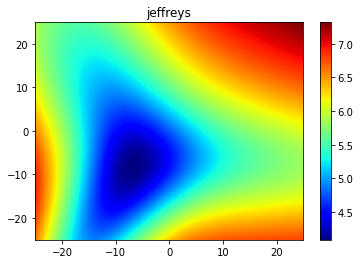

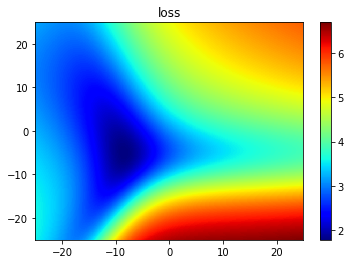

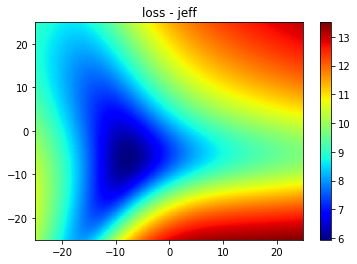

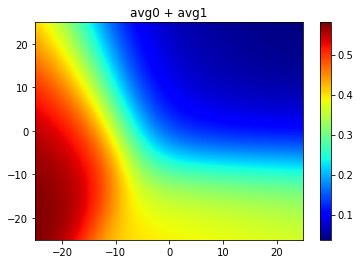

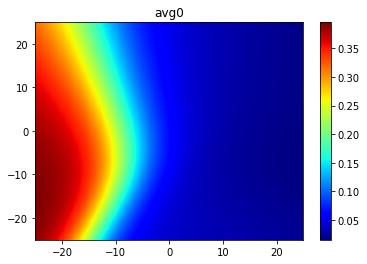

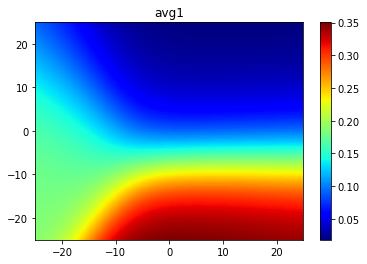

In [32]:
matplotlib.rcParams['pcolor.shading'] = 'auto'

flatten = lambda results, s: [[results[l1][l2][s] for l1 in results.keys()] for l2 in results.keys()]

loss = flatten(results, 'lossf')
jeff = flatten(results, 'jeffreys')
avg = np.array(flatten(results,'av_g'))

# plt.imshow(lambdas, lambdas, loss, 'jet')
# plt.pcolormesh(lambdas, lambdas, loss, cmap='jet')
plt.pcolormesh(lambdas, lambdas, -np.log(jeff), cmap='jet')
plt.title('jeffreys')
plt.colorbar()

plt.figure()
plt.title('loss')
plt.pcolormesh(lambdas, lambdas, loss, cmap='jet')
plt.colorbar()

plt.figure()
plt.title('loss - jeff')
plt.pcolormesh(lambdas, lambdas, loss - np.log(jeff), cmap='jet')
plt.colorbar()

plt.figure()
plt.title('avg0 + avg1')
plt.pcolormesh(lambdas, lambdas, avg[:, :, 0] + avg[:, :, 1], cmap='jet')
plt.colorbar()

plt.figure()
plt.title('avg0')
plt.pcolormesh(lambdas, lambdas, avg[:, :, 0], cmap='jet')
plt.colorbar()

plt.figure()
plt.title('avg1')
plt.pcolormesh(lambdas, lambdas, avg[:, :, 1], cmap='jet')
plt.colorbar()
plt.show()

In [35]:
lambdas0 = np.zeros(2)

def proposal(x0, dx=0.01):
    x_new = x0 + dx*np.random.normal(size=len(x0))
    return x_new

proposal_full = {'fun': proposal, 'args': ([0.5])}

def energy_fun(lambdas, if_Jeffreys):
    
    out = compute_single(lambdas, p0, g, gexp, sigma, alpha)
    
    energy = out.lossf

    av_g = out.av_g

    if if_Jeffreys:
        measure = local_density(g.T, out.P)[0]
        energy -= np.log(measure)
    
    return energy, av_g

In [36]:
energy_function = {'fun': energy_fun, 'args': ([True])}
out_J = run_Metropolis(lambdas0, proposal_full, energy_function, n_steps=10000)

energy_function = {'fun': energy_fun, 'args': ([False])}
out_noJ = run_Metropolis(lambdas0, proposal_full, energy_function, n_steps=10000)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


In [37]:
print('acceptance: ', out_J[-1], out_noJ[-1])

acceptance:  [[0.06586198 0.09460812]
 [0.06809725 0.08978886]
 [0.06865188 0.09489236]
 ...
 [0.30409682 0.07351284]
 [0.29735561 0.07081267]
 [0.29276864 0.06906812]] [[0.06586198 0.09460812]
 [0.05936721 0.09460791]
 [0.06151778 0.09661372]
 ...
 [0.40388997 0.18694461]
 [0.40388983 0.18694439]
 [0.4038898  0.18694432]]


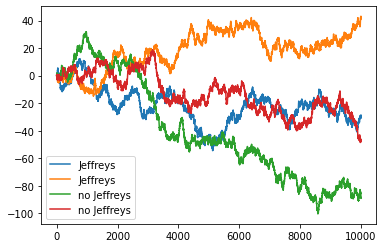

In [38]:
plt.plot(out_J[0], label='Jeffreys')
plt.plot(out_noJ[0], label='no Jeffreys')
plt.legend()

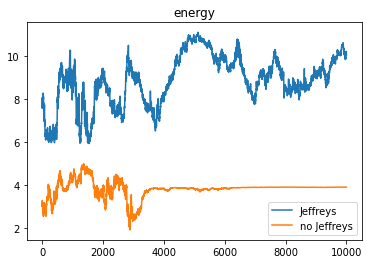

In [39]:
plt.plot(out_J[1], label='Jeffreys')
plt.plot(out_noJ[1], label='no Jeffreys')
plt.title('energy')
plt.legend()

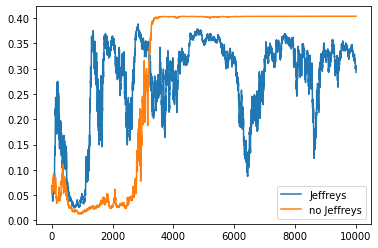

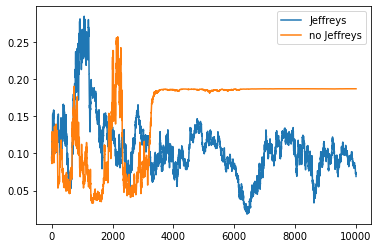

In [41]:
plt.plot(out_J[3][:, 0], label='Jeffreys')
plt.plot(out_noJ[3][:, 0], label='no Jeffreys')
plt.legend()

plt.figure()
plt.plot(out_J[3][:, 1], label='Jeffreys')
plt.plot(out_noJ[3][:, 1], label='no Jeffreys')
plt.legend()

In [43]:
av_J = np.mean(out_J[3], axis=0)
av_noJ = np.mean(out_noJ[3], axis=0)

print(av_J, av_noJ)

# here you should use block analysis
std_J = np.std(out_J[3], axis=0)/np.sqrt(len(out_J[3]))
std_noJ = np.std(out_noJ[3], axis=0)/np.sqrt(len(out_noJ[3]))

print(std_J, std_noJ)

order_par = (np.sum((av_J - av_noJ)**2/(std_J**2 + std_noJ**2)))
print(order_par)

[0.27673939 0.10785576] [0.29229769 0.15472392]
[0.00092472 0.00040978] [0.00164871 0.00052441]
5027.1516300166795
